# Can you estimate the age of an abalone?

## 📖 Background
You are working as an intern for an abalone farming operation in Japan. For operational and environmental reasons, it is an important consideration to estimate the age of the abalones when they go to market. 

Determining an abalone's age involves counting the number of rings in a cross-section of the shell through a microscope. Since this method is somewhat cumbersome and complex, you are interested in helping the farmers estimate the age of the abalone using its physical characteristics.

## 💾 The data
You have access to the following historical data ([source](https://archive.ics.uci.edu/ml/datasets/abalone)):

#### Abalone characteristics:
- "sex" - M, F, and I (infant).
- "length" - longest shell measurement.
- "diameter" - perpendicular to the length.
- "height" - measured with meat in the shell.
- "whole_wt" - whole abalone weight.
- "shucked_wt" - the weight of abalone meat.
- "viscera_wt" - gut-weight.
- "shell_wt" - the weight of the dried shell.
- "rings" - number of rings in a shell cross-section.
- "age" - the age of the abalone: the number of rings + 1.5.

***Acknowledgments**: Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn, and Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288).*

In [1]:
import pandas as pd
abalone = pd.read_csv('./data/abalone.csv')
abalone

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


## 💪 Competition challenge

Help the farmers better estimate an abalone's age using its physical characteristics.

Read the judging criteria carefully before starting all 4 criterias are compulsory. Create neat and clean notebook with description of each category.

Furthur you are not required to use any Deep learning architectures in your notebooks. Classical ML will be used only.

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Data validation, cleaning and preprocessing** | 20%       | <ul><li>Describe the validation tasks you completed and what you found. Have you made any changes to the data to enable further analysis? </li><li>Remember to describe what you did for every column in the data.</li><li>Cleaning can be done if you find abnormalities in Data.</li></ul>       |
| **Exploratory Analysis**  | 30%       | <ul><li>Describe what you found in the exploratory analysis.</li><li>Reference at least two different data visualizations you created above to demonstrate the characteristics of variables.</li><li>Reference at least one data visualization you created above to demonstrate the relationship between two or more variables.</li><li>Describe any changes you have made to the data to enable modeling</li></ul> |
| **Model Fitting** | 40% | <ul><li>Describe what type of machine learning problem you are working on.</li><li>Describe which method you selected for the baseline model and explain why you chose this model.</li><li>Describe which method you selected for the comparison model and explain why you chose this model.</li></ul> |
| **Model Evaluation** | 10% | <ul><li>Describe which metric you have selected to compare the models and why.</li><li>Explain what the outcome of this evaluation tells you about the performance of your models.</li><li>Identify, based on the evaluation, which you would consider to be the better performing approach.</li></ul> |

## ⌛️ Time is ticking. Good luck!

In [234]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
# Importing preprocessing modules
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

# Importing model selection tools
from sklearn.model_selection import train_test_split

# Importing metrics for model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error

# Importing regressors for supervised learning
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [235]:
import pandas as pd
data = pd.read_csv(r'D:\FastSemesters\k201716\casestudy\data\abalone.csv')
data.tail(5)

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12,13.5


# preprocessing 

In [236]:
#dropped rings 
data.drop(labels=['rings'],inplace=True,axis=1) 

In [237]:
data['age']=data.age.astype('int64')
data
#converted float to int for validation. 

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11


In [238]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
df = data[['sex']]

transformer = make_column_transformer(
    (OneHotEncoder(), ['sex']),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())
print(transformed_df.head())

#used one hot encoding for conversion of M,F,I into encoders. To avoid labels and normalise the data.

   onehotencoder__x0_F  onehotencoder__x0_I  onehotencoder__x0_M
0                  0.0                  0.0                  1.0
1                  0.0                  0.0                  1.0
2                  1.0                  0.0                  0.0
3                  0.0                  0.0                  1.0
4                  0.0                  1.0                  0.0


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [239]:
data.drop(labels=['sex'],axis=1,inplace=True)
data
#dropped sex to later concatenate the one hot encoded form of sex

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11


In [240]:
#concatenated the two dfs so we can late use this dataset.
transformed_df = pd.concat([transformed_df, data],axis=1,ignore_index = False)
transformed_df

,onehotencoder__x0_F,onehotencoder__x0_I,onehotencoder__x0_M,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,age
0,0.0,0.0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16
1,0.0,0.0,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8
2,1.0,0.0,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10
3,0.0,0.0,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11
4,0.0,1.0,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8
...,...,...,...,...,...,...,...,...,...,...,...
4172,1.0,0.0,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12
4173,0.0,0.0,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11
4174,0.0,0.0,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10
4175,1.0,0.0,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11


In [241]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   onehotencoder__x0_F  4177 non-null   float64
 1   onehotencoder__x0_I  4177 non-null   float64
 2   onehotencoder__x0_M  4177 non-null   float64
 3   length               4177 non-null   float64
 4   diameter             4177 non-null   float64
 5   height               4177 non-null   float64
 6   whole_wt             4177 non-null   float64
 7   shucked_wt           4177 non-null   float64
 8   viscera_wt           4177 non-null   float64
 9   shell_wt             4177 non-null   float64
 10  age                  4177 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 359.1 KB


In [244]:
transformed_df['onehotencoder__x0_F']=transformed_df.onehotencoder__x0_F.astype('int64')
transformed_df['onehotencoder__x0_I']=transformed_df.onehotencoder__x0_I.astype('int64')
transformed_df['onehotencoder__x0_M']=transformed_df.onehotencoder__x0_M.astype('int64')
#converted float values to integers.

In [247]:
transformed_df

,onehotencoder__x0_F,onehotencoder__x0_I,onehotencoder__x0_M,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,age
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8
2,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10
3,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8
...,...,...,...,...,...,...,...,...,...,...,...
4172,1,0,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12
4173,0,0,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11
4174,0,0,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10
4175,1,0,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11


# Exploratory Analysis

<AxesSubplot:>

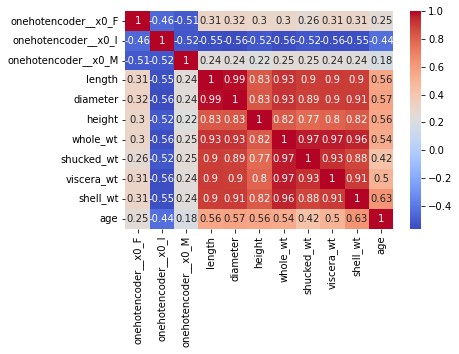

In [248]:
corr_mat = transformed_df.corr()
sb.heatmap(corr_mat, cmap='coolwarm', annot=True)
#the shell_wt has maximum correlation among all with the age of abalone. 
#all other correlations between features are visible in the heatmap.

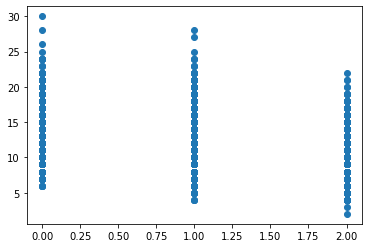

In [216]:
c3 = data['age']
c4 = data['sex']
plt.scatter(x= c4, y = c3)
plt.show()
#we see that our label age is a continous variable so we need to use regression algorithms and not classification algos.

In [113]:
import matplotlib.pyplot as plt
temp = data.groupby('sex')['age'].mean()
temp = pd.DataFrame(temp)
temp.reset_index(drop=False,inplace=True)
temp['age']=temp.age.astype('int64')
temp

,sex,age
0,0,12
1,1,11
2,2,8


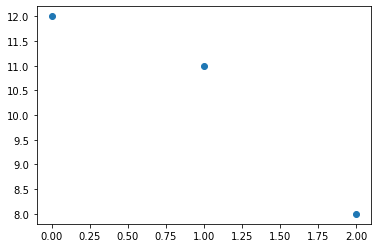

In [114]:
c1 = temp['sex']
c2 = temp['age']
plt.scatter(c1,c2)
plt.show()
#in the graph below we see that males usually are slightly younger than female abalones.

# train test split

In [203]:
array = transformed_df.values
X = array[:,0:10]
Y = array[:,10]     
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=1
                                                    ,shuffle= True)

In [204]:
print(Y)

[16.  8. 10. ... 10. 11. 13.]


In [205]:
print(X)

[[0.     0.     0.     ... 0.2245 0.101  0.15  ]
 [0.     0.     0.     ... 0.0995 0.0485 0.07  ]
 [1.     1.     0.     ... 0.2565 0.1415 0.21  ]
 ...
 [0.     0.     0.     ... 0.5255 0.2875 0.308 ]
 [1.     1.     0.     ... 0.531  0.261  0.296 ]
 [0.     0.     0.     ... 0.9455 0.3765 0.495 ]]


# Model Fitting

In [ ]:
#using GBR as a base model since our target variable is continous and becauase gbr works on an ensemble 
# so it usually gives better results. lets see..

In [254]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(    loss='squared_error',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    alpha=0.9,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
mean_squared_error(Y_test,predictions,squared=False)

2.192316701862579

In [ ]:
#for comparison I am using linear regression, randomforest and Decision tree regressor.

In [252]:
model = LinearRegression(
    fit_intercept=True,
    normalize='deprecated',
    copy_X=True,
    n_jobs=None,
    positive=False)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
mean_squared_error(Y_test,predictions,squared=False)

2.1834792448680336

In [230]:
print(model.coef_)  # this line will print slope
print(model.intercept_) # this line will print y_intercept

[ -0.03340944  -0.03340944  -0.84939248  -0.96832151  12.06428788
   9.65086771   8.74780088 -19.87162312  -9.77673977   9.17927876]
4.907968967807663


In [231]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100,
                             max_depth=None,
                             min_samples_split=2,
                             random_state=42)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
mean_squared_error(Y_test,predictions,squared=False)

2.1579960633813444

In [253]:
model = DecisionTreeRegressor(criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,)
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
mean_squared_error(Y_test,predictions,squared=False)

2.9797964029226582

# Tuning

In [273]:
#changed ccp_alpha and learning_rate.. saw no major difference.. infact it went a bit worst.

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(    loss='squared_error',
    learning_rate=0.1111,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=4,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    alpha=0.1,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.00005,)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
mean_squared_error(Y_test,predictions,squared=False)

2.1962267072430115

In [274]:
#changed n_estimators to 1000 and it improved by 0.1 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000,
                             max_depth=None,
                             min_samples_split=2,
                             random_state=42)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
mean_squared_error(Y_test,predictions,squared=False)

2.147350466578707

# Model Evaluation

In [ ]:
# I used mean_squared_error for comparison between models because it gives off a single, aggregated value to measure
# a model's overall performance. If mse is low, model is doing good perfomance.

In [ ]:
#based on mses, randomforest is working slightly better than the rest.

   results names
0     2.19   GDB
1     2.18    LR
2     2.14    RF
3     2.97    DT


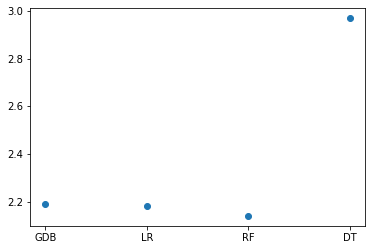

In [294]:
dataf=pd.DataFrame({'results':[2.19,2.18,2.14,2.97],'names':['GDB','LR','RF','DT']})
print(dataf)
plt.scatter(dataf['names'],dataf['results'])
plt.show()
#minimum error is for RF